In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [121]:
data=pd.read_excel('../King-RookvsKing-Pawn.xlsx',engine='openpyxl')
data['Column37']=data['Column37'].apply({'won':1,'nowin':0}.get)
data = pd.DataFrame(data)
data = data.dropna()
data.head(5)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,1.0
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,1.0
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,1.0
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,1.0
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,1.0


In [122]:
X = data[list(data.columns[1:-1])].copy()
y  = data[data.columns[-1]].copy()
# This lines calculates the number of categorical and numerical columns present in the featureset.
cat_columns = X.select_dtypes('object').columns.to_list()
num_columns = X.select_dtypes(include = np.number).columns.to_list()

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2, random_state =42)

In [124]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder = encoder.fit(X[cat_columns])
encoded_cols  = list(encoder.get_feature_names(cat_columns))
X[encoded_cols] = encoder.transform(X[cat_columns])
train_and_test_data = X[num_columns + encoded_cols]

#type(train_and_test_data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_and_test_data,y,train_size = 0.8, test_size = 0.2, random_state =42)

In [125]:
# chacking all the shapes of the train and test samples.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2556, 71)
(2556,)
(640, 71)
(640,)


In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model = DecisionTreeClassifier(random_state = 43)
model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
score = accuracy_score(train_predictions,y_train)
print('acc_score on the train_data : ',score*100 , '%')

acc_score on the train_data :  99.68701095461658 %


In [127]:
# Claculatin the test accuracy
test_preds = model.predict(X_test)
test_score = accuracy_score(test_preds, y_test)
print('The Test score is :', test_score*100 , '%')

The Test score is : 97.34375 %


19


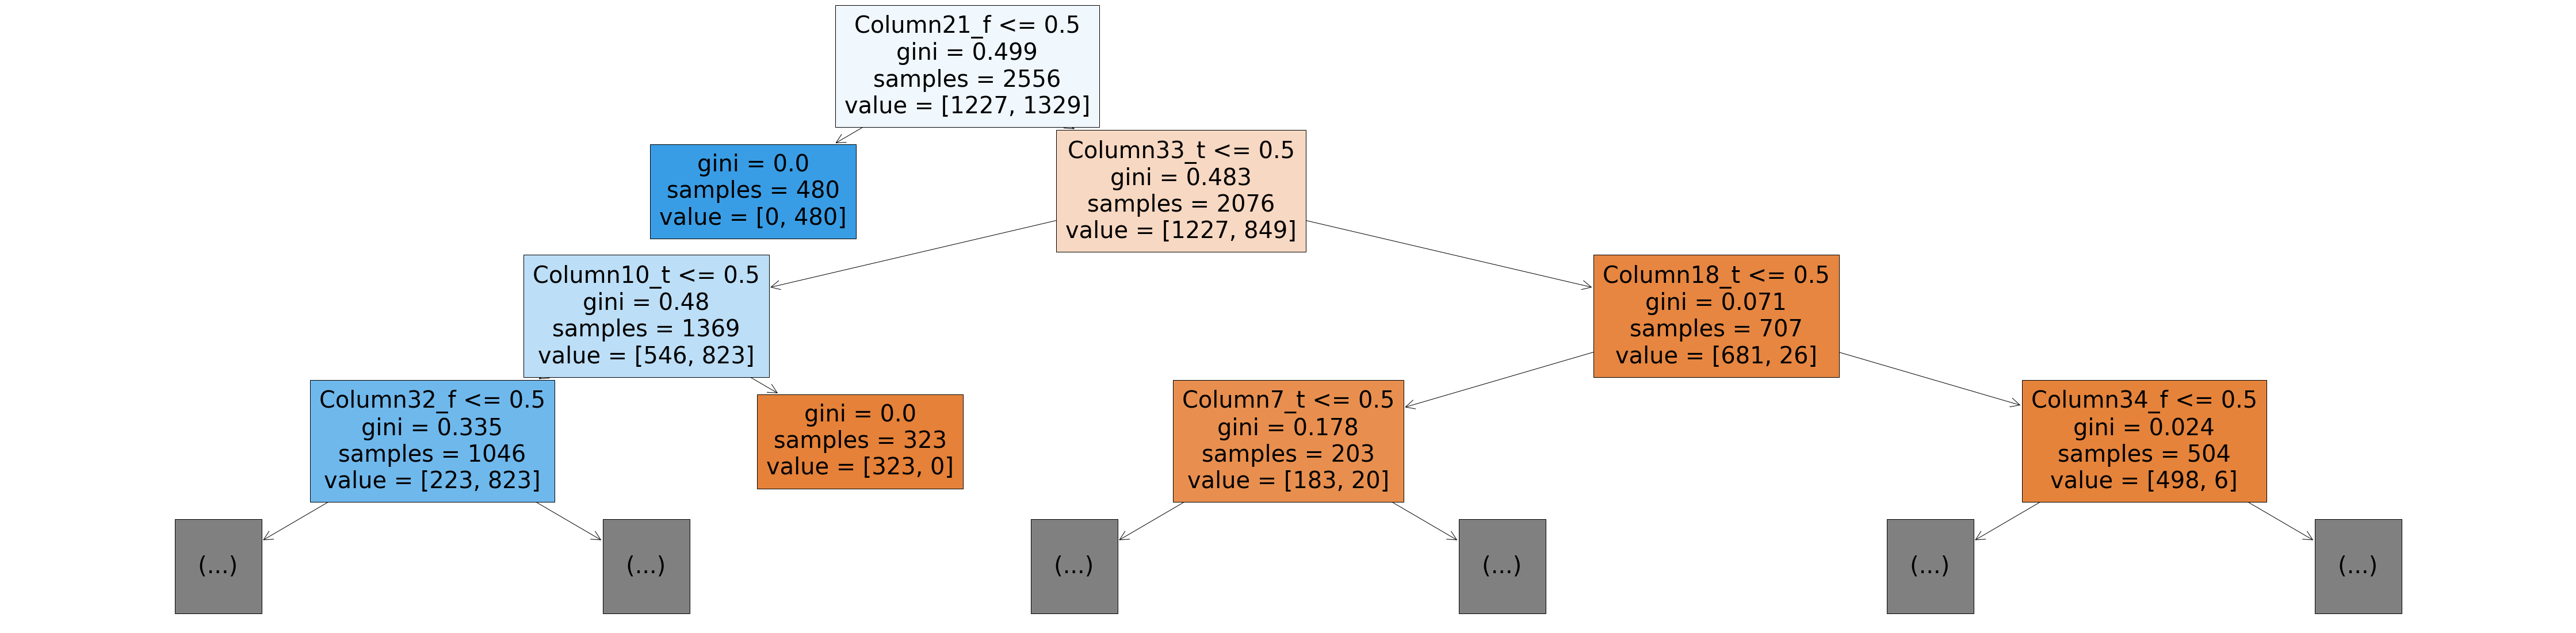

In [128]:
# A simple figure of the decision tree created while training the classification model.
from sklearn.tree import plot_tree
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True);
print(model.tree_.max_depth)

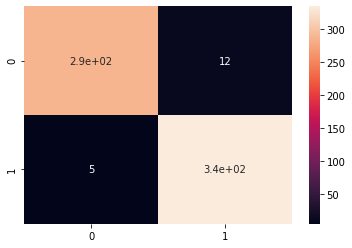

In [130]:
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, test_preds)
sns.heatmap(matrix, annot=True);